<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj34-nlp-shakespeare-text-generation?scriptVersionId=197585746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Shakespeare Text Generation Using RNN, LSTM, and GRU</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

The goal of this project is to generate Shakespearean-style text by training a model on the works of William Shakespeare. Using recurrent neural networks (RNN), long short-term memory (LSTM), and gated recurrent units (GRU), we aim to compare the performance of these models in generating coherent and stylistically appropriate text. After training, we will evaluate and determine which model performs best in terms of fluency, coherence, and ability to replicate Shakespeare’s language patterns.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.layers import Bidirectional

In [2]:
!kaggle datasets download -d mohammedmohsen0404/shakespeare-txt
!unzip shakespeare-txt.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Dataset URL: https://www.kaggle.com/datasets/mohammedmohsen0404/shakespeare-txt
License(s): apache-2.0
  0%|                                               | 0.00/2.32M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 2.32M/2.32M [00:00<00:00, 174MB/s]
Archive:  shakespeare-txt.zip
  inflating: shakespeare.txt         


In [3]:
def load_shakespeare_data():
    with open('shakespeare.txt', 'r') as file:
        corpus = file.read().lower()
    corpus = re.sub(r'[^a-z\s]', '', corpus)
    lines = corpus.splitlines()
    return lines[:10000]

text = load_shakespeare_data()

# **Take a look at the data**
---

In [4]:
text

['',
 '',
 'alls well that ends well',
 '',
 'by william shakespeare',
 '',
 'dramatis personae',
 '',
 '  king of france',
 '  the duke of florence',
 '  bertram count of rousillon',
 '  lafeu an old lord',
 '  parolles a follower of bertram',
 '  two french lords serving with bertram',
 '',
 '  steward servant to the countess of rousillon',
 '  lavache a clown and servant to the countess of rousillon',
 '  a page servant to the countess of rousillon',
 '',
 '  countess of rousillon mother to bertram',
 '  helena a gentlewoman protected by the countess',
 '  a widow of florence',
 '  diana daughter to the widow',
 '',
 '  violenta neighbour and friend to the widow',
 '  mariana neighbour and friend to the widow',
 '',
 '  lords officers soldiers etc french and florentine  ',
 '',
 'scene',
 'rousillon paris florence marseilles',
 '',
 'act i scene ',
 'rousillon the counts palace',
 '',
 'enter bertram the countess of rousillon helena and lafeu all in black',
 '',
 '  countess in deli

# **Data Preprocessing**
--------

In [5]:
#text = ' '.join(text)

**Tokenization**

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
total_words = len(tokenizer.word_index) + 1

In [7]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'of': 5, 'you': 6, 'a': 7, 'that': 8, 'my': 9, 'in': 10, 'is': 11, 'not': 12, 'it': 13, 'me': 14, 'he': 15, 'his': 16, 'for': 17, 'have': 18, 'with': 19, 'be': 20, 'but': 21, 'your': 22, 'him': 23, 'this': 24, 'will': 25, 'so': 26, 'as': 27, 'thou': 28, 'her': 29, 'antony': 30, 'what': 31, 'no': 32, 'do': 33, 'if': 34, 'shall': 35, 'all': 36, 'we': 37, 'lord': 38, 'good': 39, 'are': 40, 'by': 41, 'our': 42, 'thee': 43, 'thy': 44, 'well': 45, 'rosalind': 46, 'cleopatra': 47, 'which': 48, 'caesar': 49, 'sir': 50, 'was': 51, 'she': 52, 'o': 53, 'on': 54, 'would': 55, 'more': 56, 'come': 57, 'love': 58, 'enter': 59, 'at': 60, 'now': 61, 'from': 62, 'am': 63, 'they': 64, 'when': 65, 'or': 66, 'parolles': 67, 'know': 68, 'first': 69, 'than': 70, 'let': 71, 'man': 72, 'orlando': 73, 'ill': 74, 'then': 75, 'here': 76, 'did': 77, 'how': 78, 'there': 79, 'make': 80, 'upon': 81, 'say': 82, 'enobarbus': 83, 'an': 84, 'hath': 85, 'like': 86, 'had': 87, 'yet': 8

**Create sequences of words**

In [8]:
input_sequences = []
for line in text:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
input_sequences

[[869, 45],
 [869, 45, 8],
 [869, 45, 8, 800],
 [869, 45, 8, 800, 45],
 [41, 438],
 [41, 438, 1765],
 [1766, 1767],
 [100, 5],
 [100, 5, 439],
 [1, 125],
 [1, 125, 5],
 [1, 125, 5, 440],
 [97, 324],
 [97, 324, 5],
 [97, 324, 5, 342],
 [107, 84],
 [107, 84, 172],
 [107, 84, 172, 38],
 [67, 7],
 [67, 7, 3388],
 [67, 7, 3388, 5],
 [67, 7, 3388, 5, 97],
 [197, 549],
 [197, 549, 307],
 [197, 549, 307, 2297],
 [197, 549, 307, 2297, 19],
 [197, 549, 307, 2297, 19, 97],
 [737, 343],
 [737, 343, 4],
 [737, 343, 4, 1],
 [737, 343, 4, 1, 122],
 [737, 343, 4, 1, 122, 5],
 [737, 343, 4, 1, 122, 5, 342],
 [2298, 7],
 [2298, 7, 136],
 [2298, 7, 136, 2],
 [2298, 7, 136, 2, 343],
 [2298, 7, 136, 2, 343, 4],
 [2298, 7, 136, 2, 343, 4, 1],
 [2298, 7, 136, 2, 343, 4, 1, 122],
 [2298, 7, 136, 2, 343, 4, 1, 122, 5],
 [2298, 7, 136, 2, 343, 4, 1, 122, 5, 342],
 [7, 738],
 [7, 738, 343],
 [7, 738, 343, 4],
 [7, 738, 343, 4, 1],
 [7, 738, 343, 4, 1, 122],
 [7, 738, 343, 4, 1, 122, 5],
 [7, 738, 343, 4, 1, 122,

**Padding sequences**

In [10]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [11]:
print(max_sequence_len)
print(input_sequences)

16
[[   0    0    0 ...    0  869   45]
 [   0    0    0 ...  869   45    8]
 [   0    0    0 ...   45    8  800]
 ...
 [   0    0    0 ...  760    4   99]
 [   0    0    0 ...    4   99 2165]
 [   0    0    0 ...   99 2165  309]]


In [12]:
print(X.shape)
print(y.shape)

(63691, 15)
(63691, 7190)


**Data Splitting**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**
---



In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

**RNN Model**

In [15]:
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, 100, input_length=max_sequence_len))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(total_words, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test),
                             callbacks=[early_stopping, reduce_lr], verbose=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20


I0000 00:00:1726890568.958677      83 service.cc:145] XLA service 0x7887d400a960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726890568.958728      83 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726890568.958735      83 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 41/797 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0148 - loss: 8.3452

I0000 00:00:1726890571.857074      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0269 - loss: 7.0185 - val_accuracy: 0.0455 - val_loss: 6.5305 - learning_rate: 0.0010
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0575 - loss: 6.2811 - val_accuracy: 0.0780 - val_loss: 6.3028 - learning_rate: 0.0010
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0830 - loss: 5.8849 - val_accuracy: 0.0889 - val_loss: 6.2564 - learning_rate: 0.0010
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1013 - loss: 5.5326 - val_accuracy: 0.0931 - val_loss: 6.3018 - learning_rate: 0.0010
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1181 - loss: 5.1935 - val_accuracy: 0.0914 - val_loss: 6.3703 - learning_rate: 0.0010
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1406 - loss: 4.8466 - val_accuracy: 0.0933 - val_loss: 6.4020 - learning_rate: 5.0000e-04
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1604 - loss: 4.6595 - val_ac

**LSTM Model**

In [16]:
model_lstm = Sequential()
model_lstm.add(Embedding(total_words, 100, input_length=max_sequence_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(total_words, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test),
                               callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.0262 - loss: 7.0481 - val_accuracy: 0.0361 - val_loss: 6.6105 - learning_rate: 0.0010
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0378 - loss: 6.4328 - val_accuracy: 0.0520 - val_loss: 6.5206 - learning_rate: 0.0010
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0558 - loss: 6.1976 - val_accuracy: 0.0685 - val_loss: 6.4428 - learning_rate: 0.0010
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0705 - loss: 6.0005 - val_accuracy: 0.0812 - val_loss: 6.4020 - learning_rate: 0.0010
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0860 - loss: 5.7814 - val_accuracy: 0.0845 - val_loss: 6.4060 - learning_rate: 0.0010


**GRU Model**

In [17]:
model_gru = Sequential()
model_gru.add(Embedding(total_words, 100, input_length=max_sequence_len))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(total_words, activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test),
                             callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0286 - loss: 7.0737 - val_accuracy: 0.0483 - val_loss: 6.4650 - learning_rate: 0.0010
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0540 - loss: 6.2439 - val_accuracy: 0.0769 - val_loss: 6.2954 - learning_rate: 0.0010
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0825 - loss: 5.9112 - val_accuracy: 0.0907 - val_loss: 6.2393 - learning_rate: 0.0010
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1008 - loss: 5.6125 - val_accuracy: 0.0928 - val_loss: 6.2626 - learning_rate: 0.0010
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1132 - loss: 5.3311 - val_accuracy: 0.0929 - val_loss: 6.3059 - learning_rate: 0.0010
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1265 - loss: 5.0565 - val_accuracy: 0.0933 - val_loss: 6.3857 - learning_rate: 5.0000e-04
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1378 - loss: 4.877

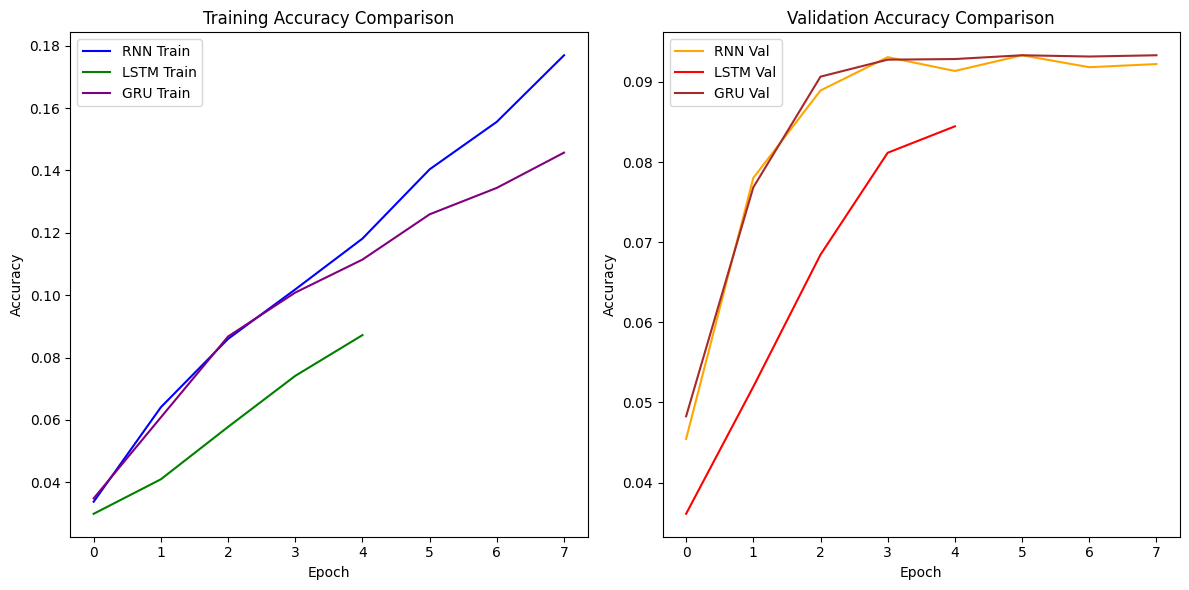

In [18]:
# Step 6: Plot training and validation accuracy for all models
plt.figure(figsize=(12, 6))

# Plot training accuracy for all models
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='RNN Train', color='blue')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train', color='green')
plt.plot(history_gru.history['accuracy'], label='GRU Train', color='purple')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy for all models
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val', color='orange')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val', color='red')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val', color='brown')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


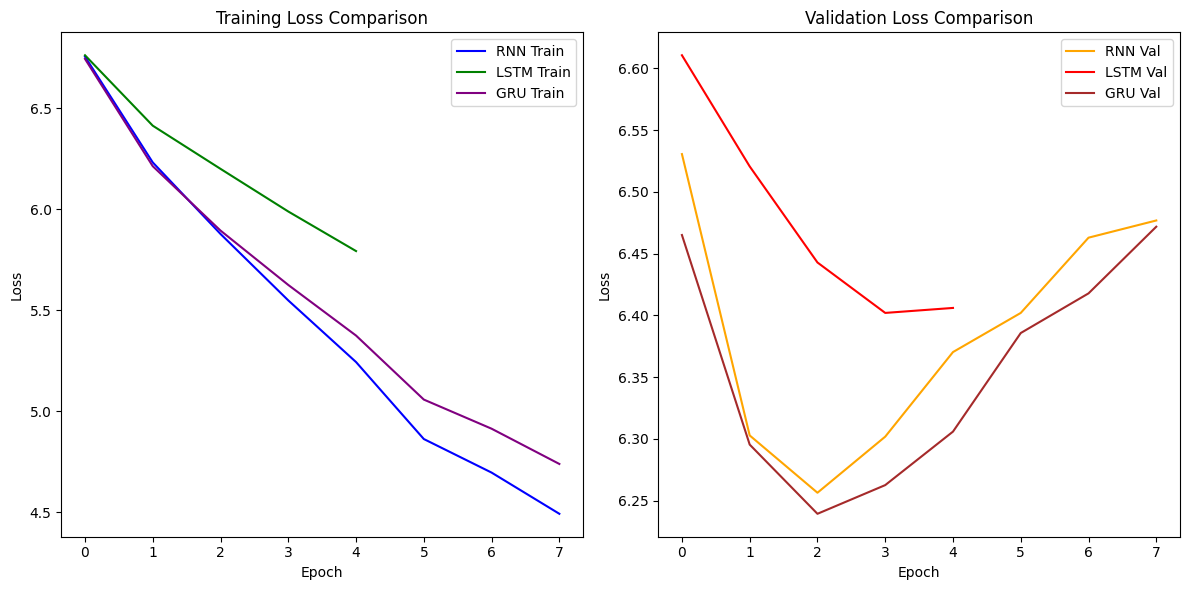

In [19]:
# Step 6: Plot training and validation loss for all models
plt.figure(figsize=(12, 6))

# Plot training loss for all models
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='RNN Train', color='blue')
plt.plot(history_lstm.history['loss'], label='LSTM Train', color='green')
plt.plot(history_gru.history['loss'], label='GRU Train', color='purple')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss for all models
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_loss'], label='RNN Val', color='orange')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val', color='red')
plt.plot(history_gru.history['val_loss'], label='GRU Val', color='brown')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Generating text**
---

In [20]:
import numpy as np
import tensorflow as tf

# Function to generate predictions for the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)[0]
    predicted_word = tokenizer.index_word[predicted_word_index]
    return predicted_word

# Function to evaluate the model on a set of seed texts
def evaluate_model(model, tokenizer, seed_texts, max_sequence_len):
    for seed_text in seed_texts:
        print(f"Seed Text: {seed_text}")
        predicted_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
        print(f"Predicted Next Word: {predicted_word}\n")

# Sample seed texts from the dataset
seed_texts = [
    "to be or not to",
    "the quick brown fox",
    "friends romans countrymen",
    "all the world is a",
    "love looks not with the"
]

print("Evaluating RNN model:\n")
evaluate_model(model_rnn, tokenizer, seed_texts, max_sequence_len)
print('-------------------------------')
print("Evaluating LSTM model:\n")
evaluate_model(model_lstm, tokenizer, seed_texts, max_sequence_len)
print('-------------------------------')
print("Evaluating GRU model:\n")
evaluate_model(model_gru, tokenizer, seed_texts, max_sequence_len)

Evaluating RNN model:

Seed Text: to be or not to
Predicted Next Word: the

Seed Text: the quick brown fox
Predicted Next Word: and

Seed Text: friends romans countrymen
Predicted Next Word: the

Seed Text: all the world is a
Predicted Next Word: man

Seed Text: love looks not with the
Predicted Next Word: world

-------------------------------
Evaluating LSTM model:

Seed Text: to be or not to
Predicted Next Word: the

Seed Text: the quick brown fox
Predicted Next Word: the

Seed Text: friends romans countrymen
Predicted Next Word: the

Seed Text: all the world is a
Predicted Next Word: of

Seed Text: love looks not with the
Predicted Next Word: of

-------------------------------
Evaluating GRU model:

Seed Text: to be or not to
Predicted Next Word: be

Seed Text: the quick brown fox
Predicted Next Word: i

Seed Text: friends romans countrymen
Predicted Next Word: not

Seed Text: all the world is a
Predicted Next Word: man

Seed Text: love looks not with the
Predicted Next Word: worl